In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# Import Libraries and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [3]:
# Load the time series data into a pandas dataframe
Data = pd.read_csv(r'/kaggle/input/mushroom-classification/mushrooms.csv')
data = pd.DataFrame(Data)

# Import Most used Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Convert categorical features to numerical features

In [5]:
from sklearn.preprocessing import LabelEncoder


# select only categorical columns
cat_cols = data.select_dtypes(include=['object','category']).columns

# apply label encoding to each column
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print(data)


      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

# Seperate Classes and Features from each other

In [6]:
# separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Split Data to Train and Test

In [7]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,  #X_scaled
                                                    test_size =0.20, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(6499, 22)


# Neural Network 

In [8]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model

**Normalize features**

In [9]:
X = (X - X.mean()) / X.std()

**create the model**

In [10]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


**Plot the model**

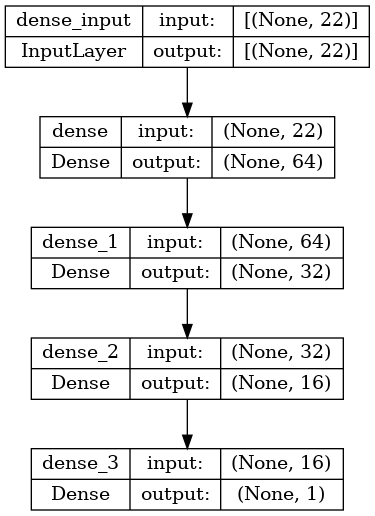

In [11]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**compile the model**

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**train the model**

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
407/407 [==============================] - 2s 2ms/step - loss: 0.3008 - accuracy: 0.8797
Epoch 2/50
407/407 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9600
Epoch 3/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0397 - accuracy: 0.9888
Epoch 4/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0185 - accuracy: 0.9948
Epoch 5/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.9971
Epoch 6/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9985
Epoch 7/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 8/50
407/407 [==============================] - 1s 2ms/step - loss: 8.7707e-04 - accuracy: 1.0000
Epoch 9/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 10/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.

In [14]:
# Get predicted values on new data
y_pred = model.predict(X_test)

51/51 [==============================] - 0s 1ms/step


**evaluate the model on the testing set**

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 1.0


# ROC Curve

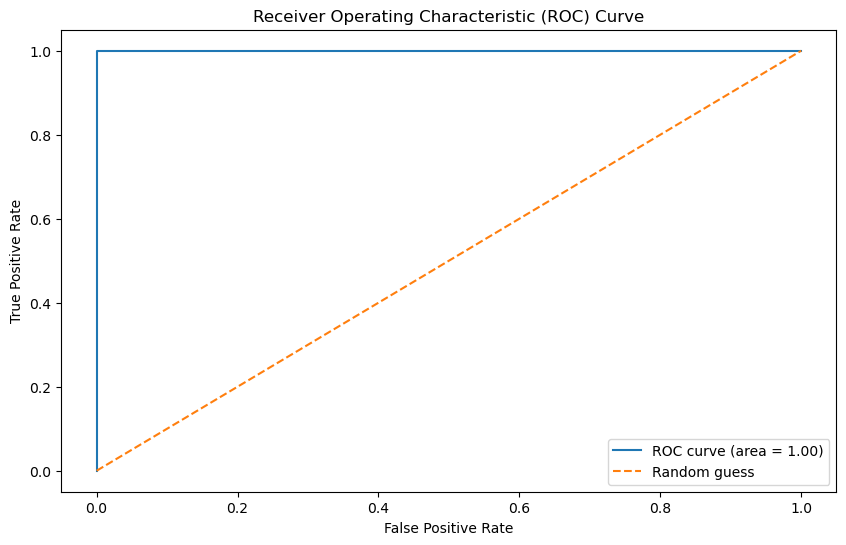

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true labels and predicted labels respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
